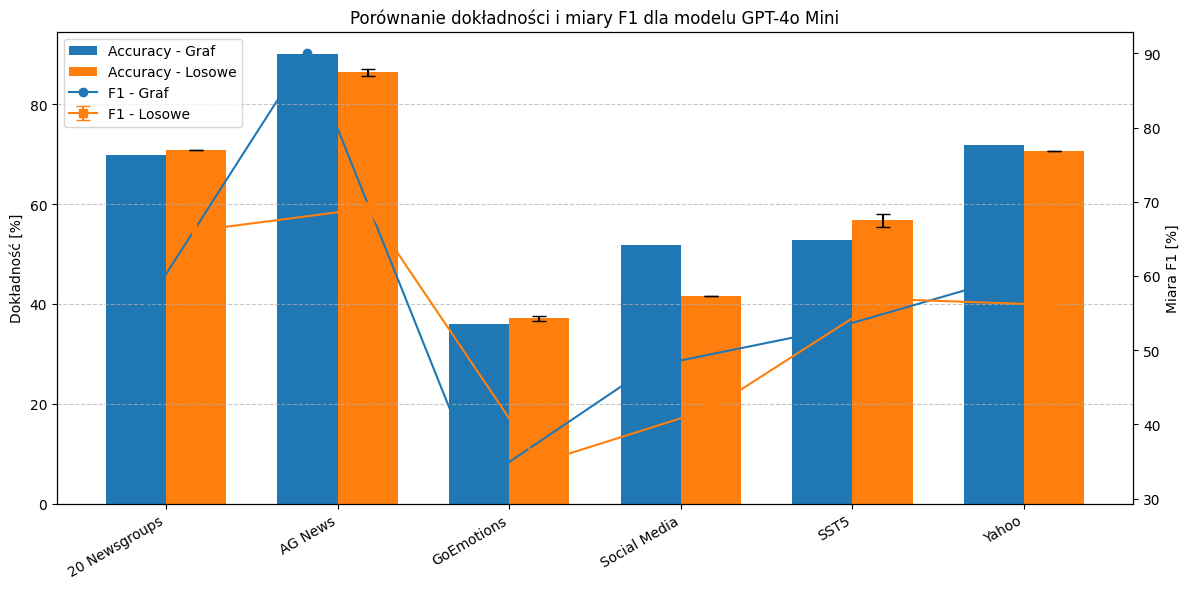

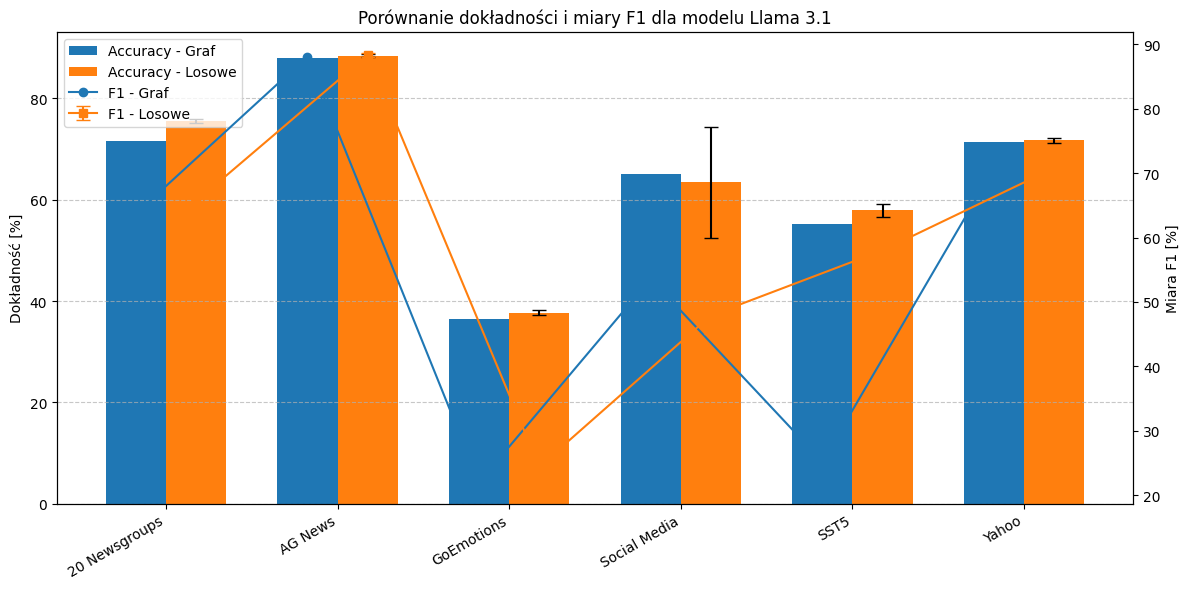

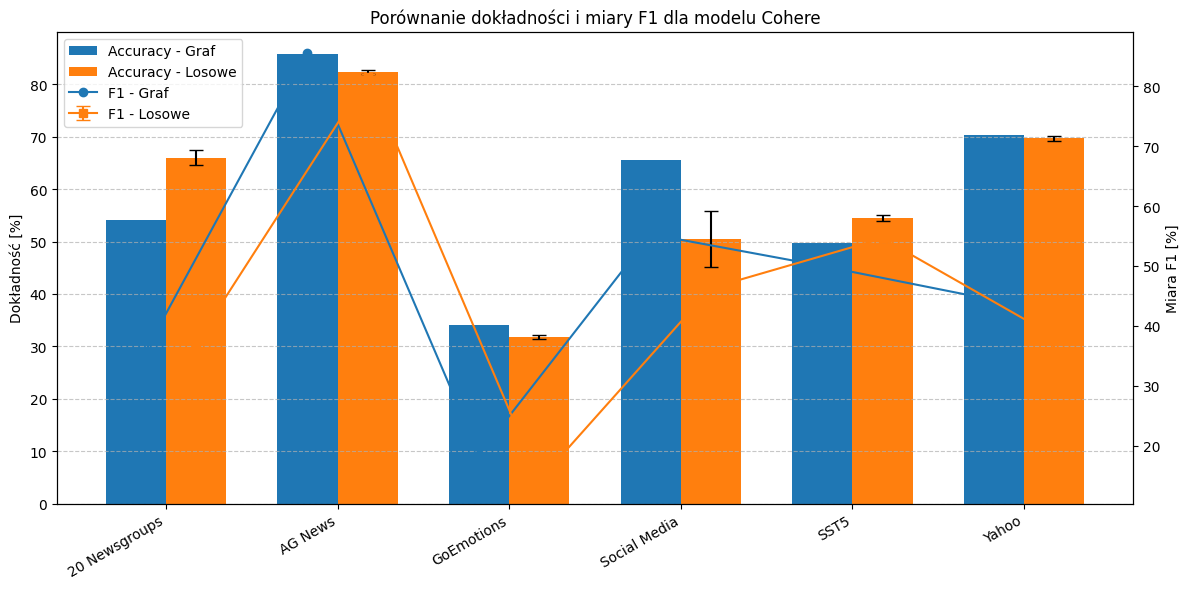

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dane z pierwszej tabeli (graf osadzeń)
data_graph = {
    "Dataset": ["20 Newsgroups", "20 Newsgroups", "20 Newsgroups",
                "AG News", "AG News", "AG News",
                "GoEmotions", "GoEmotions", "GoEmotions",
                "Social Media", "Social Media", "Social Media",
                "SST5", "SST5", "SST5",
                "Yahoo", "Yahoo", "Yahoo"],
    "Model": ["GPT-4o Mini", "Llama 3.1", "Cohere"] * 6,
    "Accuracy": [69.9, 71.6, 54.1,
                 90.0, 88.0, 85.7,
                 36.0, 36.5, 34.1,
                 51.8, 65.1, 65.5,
                 52.8, 55.3, 49.8,
                 71.8, 71.3, 70.4],
    "F1": [53.9, 63.7, 32.8,
           90.0, 88.1, 85.5,
           32.2, 22.0, 18.5,
           47.8, 53.6, 55.3,
           52.5, 25.2, 50.0,
           59.2, 70.8, 44.3],
}

df_graph = pd.DataFrame(data_graph)

# Dane z drugiej tabeli (średnia i odchylenie std)
data_random = {
    "Dataset": ["20 Newsgroups", "20 Newsgroups", "20 Newsgroups",
                "AG News", "AG News", "AG News",
                "GoEmotions", "GoEmotions", "GoEmotions",
                "Social Media", "Social Media", "Social Media",
                "SST5", "SST5", "SST5",
                "Yahoo", "Yahoo", "Yahoo"],
    "Model": ["GPT-4o Mini", "Llama 3.1", "Cohere"] * 6,
    "Accuracy_mean": [70.9, 75.6, 66.0,
                      86.4, 88.4, 82.3,
                      37.1, 37.7, 31.8,
                      41.5, 63.4, 50.5,
                      56.8, 57.9, 54.5,
                      70.6, 71.7, 69.7],
    "Accuracy_std": [0.0, 0.4, 1.5,
                     0.7, 0.3, 0.4,
                     0.5, 0.5, 0.3,
                     0.0, 11.0, 5.3,
                     1.3, 1.3, 0.6,
                     0.0, 0.5, 0.5],
    "F1_mean": [66.1, 65.6, 37.1,
                69.1, 88.3, 81.6,
                34.8, 24.4, 14.2,
                42.1, 47.9, 46.3,
                56.9, 58.0, 54.6,
                56.1, 70.8, 38.3],
    "F1_std": [2.4, 0.8, 2.4,
               0.9, 0.3, 0.5,
               0.4, 1.2, 0.3,
               0.6, 2.9, 1.5,
               1.5, 1.2, 0.4,
               3.2, 0.3, 4.4]
}

df_random = pd.DataFrame(data_random)

# Funkcja do wykresu porównującego accuracy i F1 dla jednego modelu
def plot_comparison(model):
    df_g = df_graph[df_graph["Model"] == model]
    df_r = df_random[df_random["Model"] == model]
    
    ind = np.arange(len(df_g))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12,6))
    
    # Accuracy - metoda graf
    acc_graph = df_g["Accuracy"].values
    # Accuracy - metoda random + std
    acc_random = df_r["Accuracy_mean"].values
    acc_random_std = df_r["Accuracy_std"].values
    
    # F1 - metoda graf
    f1_graph = df_g["F1"].values
    # F1 - metoda random + std
    f1_random = df_r["F1_mean"].values
    f1_random_std = df_r["F1_std"].values
    
    # Słupki accuracy
    rects1 = ax.bar(ind - width/2, acc_graph, width, label='Accuracy - Graf')
    rects2 = ax.bar(ind + width/2, acc_random, width, yerr=acc_random_std, label='Accuracy - Losowe', capsize=5)
    
    # Linia F1 na sekundarnej osi
    ax2 = ax.twinx()
    line1 = ax2.plot(ind - width/2, f1_graph, 'o-', label='F1 - Graf')
    line2 = ax2.errorbar(ind + width/2, f1_random, yerr=f1_random_std, fmt='s-', label='F1 - Losowe', capsize=5)
    
    # Opisy osi
    ax.set_xticks(ind)
    ax.set_xticklabels(df_g["Dataset"], rotation=30, ha='right')
    ax.set_ylabel('Dokładność [%]')
    ax2.set_ylabel('Miara F1 [%]')
    ax.set_title(f'Porównanie dokładności i miary F1 dla modelu {model}')
    
    # Legenda łączona z obu osi
    bars = [rects1, rects2]
    lines = line1 + [line2]
    labels = [b.get_label() for b in bars] + [l.get_label() for l in lines]
    ax.legend(bars + lines, labels, loc='upper left')
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Generujemy wykresy dla wszystkich modeli
for model in ["GPT-4o Mini", "Llama 3.1", "Cohere"]:
    plot_comparison(model)


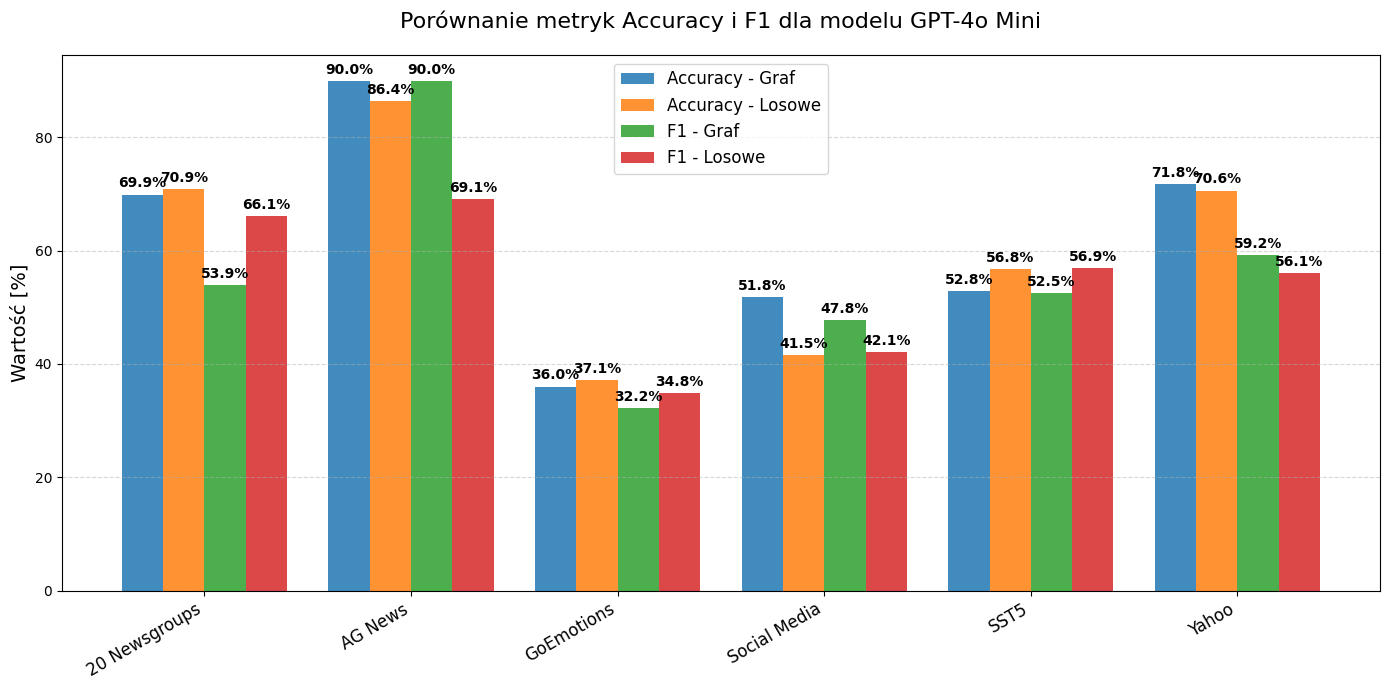

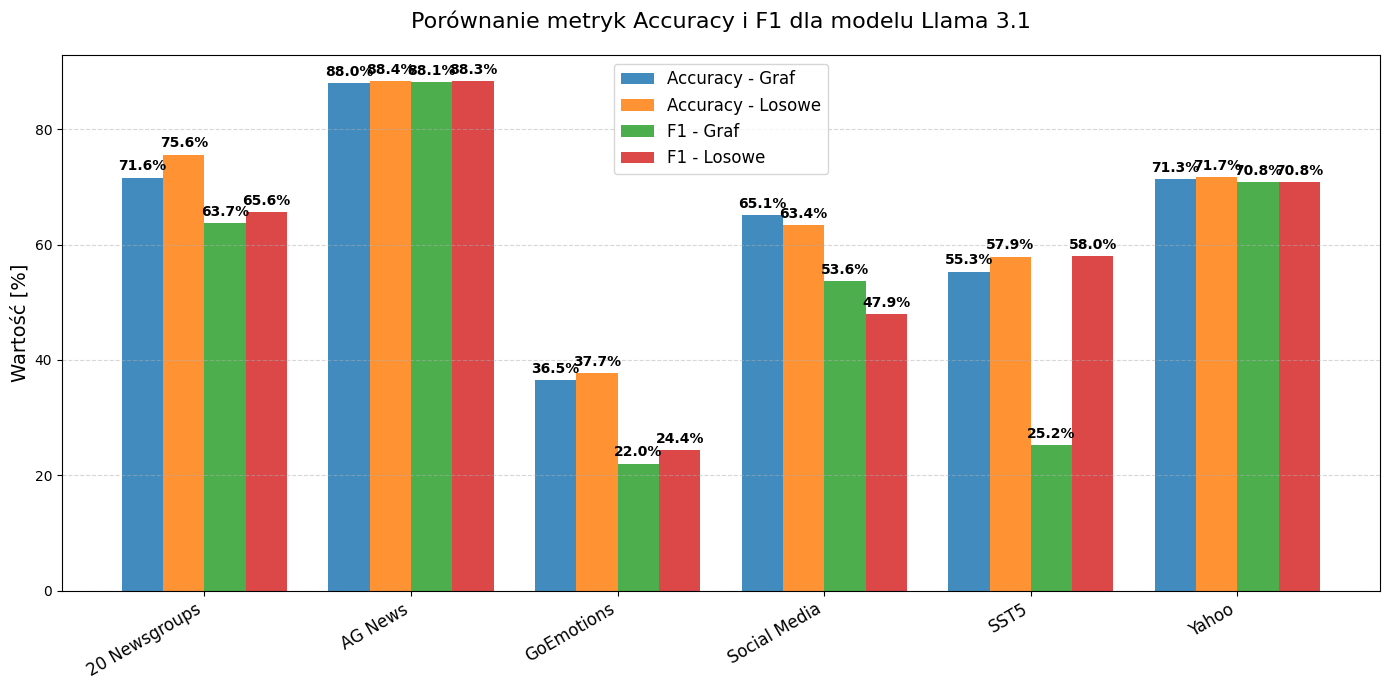

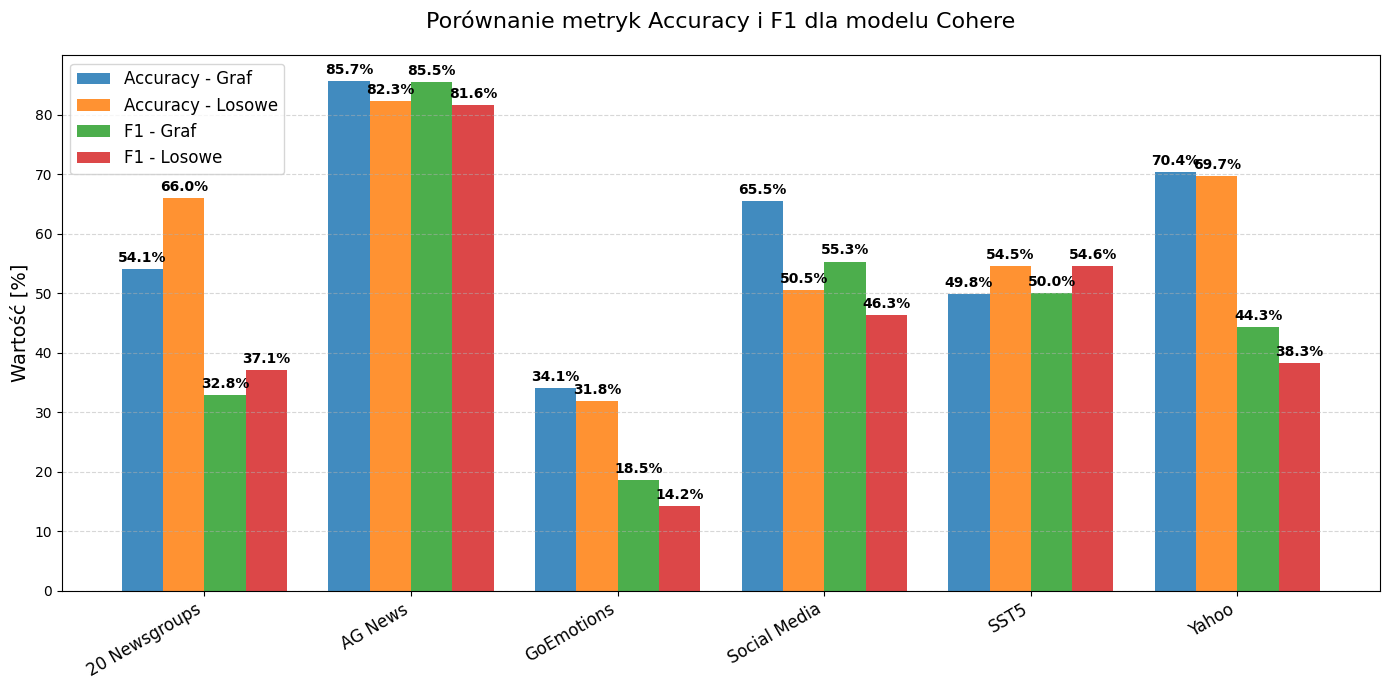

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dane jak wcześniej
# (możesz wczytać df_graph i df_random jak w poprzednim przykładzie)

def plot_modern_comparison(model):
    df_g = df_graph[df_graph["Model"] == model].reset_index(drop=True)
    df_r = df_random[df_random["Model"] == model].reset_index(drop=True)

    categories = df_g["Dataset"]
    n = len(categories)
    
    # Przygotowanie danych do wykresu: accuracy i f1 z dwóch metod
    accuracy_graph = df_g["Accuracy"]
    accuracy_random = df_r["Accuracy_mean"]
    f1_graph = df_g["F1"]
    f1_random = df_r["F1_mean"]

    ind = np.arange(n)
    width = 0.2

    fig, ax = plt.subplots(figsize=(14, 7))

    # Słupki Accuracy
    bars_acc_g = ax.bar(ind - width*1.5, accuracy_graph, width, label='Accuracy - Graf', alpha=0.85)
    bars_acc_r = ax.bar(ind - width*0.5, accuracy_random, width, label='Accuracy - Losowe', alpha=0.85)

    # Słupki F1
    bars_f1_g = ax.bar(ind + width*0.5, f1_graph, width, label='F1 - Graf', alpha=0.85)
    bars_f1_r = ax.bar(ind + width*1.5, f1_random, width, label='F1 - Losowe', alpha=0.85)

    # Opisy osi i tytuł
    ax.set_xticks(ind)
    ax.set_xticklabels(categories, rotation=30, ha='right', fontsize=12)
    ax.set_ylabel('Wartość [%]', fontsize=14)
    ax.set_title(f'Porównanie metryk Accuracy i F1 dla modelu {model}', fontsize=16, pad=20)

    # Dodawanie wartości nad słupkami dla czytelności
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # przesunięcie etykiety
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=10, color='black', fontweight='bold')

    for bars in [bars_acc_g, bars_acc_r, bars_f1_g, bars_f1_r]:
        add_labels(bars)

    ax.legend(fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Uruchomienie dla każdego modelu
for m in ["GPT-4o Mini", "Llama 3.1", "Cohere"]:
    plot_modern_comparison(m)


In [50]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import os

plt.style.use('ggplot')

def plot_and_save_separate_metrics(folder='wykresy'):
    os.makedirs(folder, exist_ok=True)

    models = ["GPT-4o Mini", "Llama 3.1", "Cohere"]
    metrics = [("Accuracy", "Dokładność"), ("F1", "Miara F1")]
    datasets = df_graph["Dataset"].unique()
    n_datasets = len(datasets)
    width = 0.5  # szerokość słupków

    gap = 1.2  # odstęp między grupami słupków

    for model in models:
        df_g = df_graph[df_graph["Model"] == model].reset_index(drop=True)
        df_r = df_random[df_random["Model"] == model].reset_index(drop=True)

        for metric_key, metric_label in metrics:
            plt.figure(figsize=(15, 10))

            graf_vals = df_g[metric_key].values
            random_vals = df_r[f"{metric_key}_mean"].values

            ind = np.arange(n_datasets) * gap  # zwiększony odstęp między grupami

            bars1 = plt.bar(ind - width/2, graf_vals, width, label='Strategia oparta na grafie',
                            color='dodgerblue', edgecolor='black', linewidth=1.2, alpha=0.9)
            bars2 = plt.bar(ind + width/2, random_vals, width, label='Strategia losowa',
                            color='orange', edgecolor='black', linewidth=1.2, alpha=0.9)

            plt.ylim(0, 105)
            plt.ylabel(f'{metric_label} [%]', fontsize=14)
            plt.title(f'Porównanie strategii opartej na grafie z selekcją losową dla modelu {model} - {metric_label.lower()}', 
                      fontsize=20, fontweight='bold')
            plt.grid(axis='y', linestyle='--', alpha=0.5)

            plt.yticks(np.arange(0, 110, 10), [f"{x}%" for x in range(0, 110, 10)])

            plt.xticks(ind, datasets, rotation=30, ha='right', fontsize=15)

            # Wartości nad słupkami z przecinkiem
            for bar in bars1:
                w = bar.get_height()
                tekst = f'{w:.1f}'.replace('.', ',') + '%'
                plt.text(bar.get_x() + bar.get_width()/2, w + 1, tekst, ha='center', va='bottom', fontsize=15)
            for bar in bars2:
                w = bar.get_height()
                tekst = f'{w:.1f}'.replace('.', ',') + '%'
                plt.text(bar.get_x() + bar.get_width()/2, w + 1, tekst, ha='center', va='bottom', fontsize=15)

            plt.legend(fontsize=12)
            plt.tight_layout()

            filename = f"{folder}/wyniki_page_{metric_key.lower()}_{model.replace(' ', '_').replace('.', '')}.png"
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            plt.close()

plot_and_save_separate_metrics()
